<a href="https://colab.research.google.com/github/SivWebProjects/PythonTaskFiles/blob/master/detecting_asan_human_pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary packages

In [ ]:
import mediapipe as mp
import cv2
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.svm import SVC

Initialize the Pose Detection Model

In [ ]:
# Initialize the media pipe pose main class.
# Stored the instance of pose detection class in mp_pose variable
mp_pose = mp.solutions.pose
# Setup the Pose function for images independently for the images standalone processing.
# mp_pose will use to call the Pose method.
pose = mp_pose.Pose(static_image_mode=True)
# Initialize mediapipe drawing class to draw the landmarks points. 
# It draw keypoints
mp_draw = mp.solutions.drawing_utils 
# Detect 33 Landmarks
points = mp_pose.PoseLandmark 

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Print 33 keypoint names

In [ ]:
print(len(points))
for i in points:
    print(i)

33
PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


Create an empty Pandas data frame and enter the columns

In [ ]:
data = []
for p in points:
        x = str(p)[13:] # Takes PoseLandmark object characters from 13 to end
        data.append(x + "_x")
        data.append(x + "_y")
        data.append(x + "_z")
        data.append(x + "_vis")
# Dependent variable       
data.append("OUTPUT") 
data = pd.DataFrame(columns = data) 
print(data.shape)

(0, 133)


Extract keypoints from each image and store them in respective columns

In [ ]:
count = 0
img_count = 0
# train dataset path
folder_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/train/tree" 
# csv file path
csv_file_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/yoga_data_csv_files/yoga_tree_data.csv" 

# listdir() method in python is used to get the list of all files and directories in the specified directory.
# Loop over each image
for img_path in os.listdir(folder_path):
    temp = []
    new_path = str(path) + "/" + str(img_path)
    print(new_path)
    img = cv2.imread(path + "/" + img_path)
    img_count += 1
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    results = pose.process(imgRGB)
    print(results.pose_landmarks)
    if results.pose_landmarks:
        # Access data from landmark dictionary
        landmarks = results.pose_landmarks.landmark 
        for i,j in zip(points,landmarks):
                temp = temp + [j.x, j.y, j.z, j.visibility] 
        data.loc[count] = temp + [4]
        count +=1
        print(count)
print(img_count)
# Append data into the csv file
data.to_csv(csv_file_path) 

/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/train/tree/00000185.jpg
landmark {
  x: 0.4982144236564636
  y: 0.23375123739242554
  z: -0.05608993396162987
  visibility: 0.9988135099411011
}
landmark {
  x: 0.5062902569770813
  y: 0.22317638993263245
  z: -0.03196293115615845
  visibility: 0.9990209341049194
}
landmark {
  x: 0.5108157396316528
  y: 0.22386178374290466
  z: -0.03204613924026489
  visibility: 0.9983651041984558
}
landmark {
  x: 0.514826238155365
  y: 0.22474360466003418
  z: -0.0320851169526577
  visibility: 0.9990249872207642
}
landmark {
  x: 0.4941580295562744
  y: 0.22286584973335266
  z: -0.03219057247042656
  visibility: 0.9987180233001709
}
landmark {
  x: 0.4906008541584015
  y: 0.22344079613685608
  z: -0.032222047448158264
  visibility: 0.9977533221244812
}
landmark {
  x: 0.4873063564300537
  y: 0.2240915596485138
  z: -0.03222883865237236
  visibility: 0.998210072517395
}
landmark {
  x: 0.5223389267921448
  y: 0.23309558629989624
  z: 0.07918383926

landmark {
  x: 0.5874723196029663
  y: 0.26990288496017456
  z: -0.3264429569244385
  visibility: 0.9969843029975891
}
landmark {
  x: 0.5941357612609863
  y: 0.2559358477592468
  z: -0.3033369183540344
  visibility: 0.9963133931159973
}
landmark {
  x: 0.600582480430603
  y: 0.256314218044281
  z: -0.3033517599105835
  visibility: 0.9964075684547424
}
landmark {
  x: 0.6068841218948364
  y: 0.25664985179901123
  z: -0.30354413390159607
  visibility: 0.9967882037162781
}
landmark {
  x: 0.5774160027503967
  y: 0.25528839230537415
  z: -0.2992299199104309
  visibility: 0.9953141808509827
}
landmark {
  x: 0.5704877972602844
  y: 0.25475966930389404
  z: -0.2993684411048889
  visibility: 0.9946990013122559
}
landmark {
  x: 0.564516544342041
  y: 0.2545420825481415
  z: -0.29956454038619995
  visibility: 0.9945173263549805
}
landmark {
  x: 0.6180869936943054
  y: 0.26517245173454285
  z: -0.17275571823120117
  visibility: 0.9960722327232361
}
landmark {
  x: 0.5625731348991394
  y: 0.2

landmark {
  x: 0.5475241541862488
  y: 0.3002866804599762
  z: -0.25738415122032166
  visibility: 0.9235708117485046
}
landmark {
  x: 0.5568647980690002
  y: 0.27557840943336487
  z: -0.2563806176185608
  visibility: 0.9279677867889404
}
landmark {
  x: 0.5647791028022766
  y: 0.2757209539413452
  z: -0.2565512955188751
  visibility: 0.9310097098350525
}
landmark {
  x: 0.5732566714286804
  y: 0.27554506063461304
  z: -0.25664085149765015
  visibility: 0.9318496584892273
}
landmark {
  x: 0.5342925786972046
  y: 0.2752198576927185
  z: -0.276445597410202
  visibility: 0.9312335252761841
}
landmark {
  x: 0.5255324244499207
  y: 0.2751352787017822
  z: -0.2764507532119751
  visibility: 0.9299861192703247
}
landmark {
  x: 0.5167407393455505
  y: 0.27462443709373474
  z: -0.2768353521823883
  visibility: 0.9304828643798828
}
landmark {
  x: 0.5850266814231873
  y: 0.29205045104026794
  z: -0.13875766098499298
  visibility: 0.9422968626022339
}
landmark {
  x: 0.5068717002868652
  y: 0.

landmark {
  x: 0.6231382489204407
  y: 0.207656130194664
  z: -0.37455740571022034
  visibility: 0.9395252466201782
}
landmark {
  x: 0.6291512250900269
  y: 0.20039249956607819
  z: -0.2588365077972412
  visibility: 0.9416795372962952
}
landmark {
  x: 0.6366910338401794
  y: 0.20008231699466705
  z: -0.25711551308631897
  visibility: 0.9445400834083557
}
landmark {
  x: 0.6445987820625305
  y: 0.20002882182598114
  z: -0.255867600440979
  visibility: 0.9446536302566528
}
landmark {
  x: 0.6076636910438538
  y: 0.2013845592737198
  z: -0.39627328515052795
  visibility: 0.944142758846283
}
landmark {
  x: 0.5992820858955383
  y: 0.20195625722408295
  z: -0.3954095244407654
  visibility: 0.9451833963394165
}
landmark {
  x: 0.5913804173469543
  y: 0.2026965618133545
  z: -0.395328164100647
  visibility: 0.9473109841346741
}
landmark {
  x: 0.6583217978477478
  y: 0.2066347599029541
  z: 0.2379191666841507
  visibility: 0.9460102319717407
}
landmark {
  x: 0.5876041054725647
  y: 0.2117

landmark {
  x: 0.4533396065235138
  y: 0.23810215294361115
  z: -0.2679896354675293
  visibility: 0.9634012579917908
}
landmark {
  x: 0.4603104293346405
  y: 0.07985148578882217
  z: -0.23329557478427887
  visibility: 0.9643056988716125
}
landmark {
  x: 0.46540164947509766
  y: 0.05604614317417145
  z: -0.23326611518859863
  visibility: 0.9659779667854309
}
landmark {
  x: 0.47026127576828003
  y: 0.04370370879769325
  z: -0.23327943682670593
  visibility: 0.9662026166915894
}
landmark {
  x: 0.4450271725654602
  y: 0.12301419675350189
  z: -0.23381951451301575
  visibility: 0.9652298092842102
}
landmark {
  x: 0.43873336911201477
  y: 0.14626353979110718
  z: -0.23403871059417725
  visibility: 0.9656858444213867
}
landmark {
  x: 0.4320768713951111
  y: 0.17029739916324615
  z: -0.2344505935907364
  visibility: 0.9672356247901917
}
landmark {
  x: 0.47922036051750183
  y: 0.1443515419960022
  z: -0.08550561964511871
  visibility: 0.966442883014679
}
landmark {
  x: 0.42710104584693

landmark {
  x: 0.43732497096061707
  y: 0.2702232599258423
  z: -0.1634642481803894
  visibility: 0.9729680418968201
}
landmark {
  x: 0.4216617941856384
  y: 0.2580854296684265
  z: -0.1316562443971634
  visibility: 0.9734947681427002
}
landmark {
  x: 0.43801349401474
  y: 0.2587876319885254
  z: -0.13154518604278564
  visibility: 0.9744967818260193
}
landmark {
  x: 0.43008050322532654
  y: 0.25964170694351196
  z: -0.1316484957933426
  visibility: 0.9747542142868042
}
landmark {
  x: 0.4113544523715973
  y: 0.2577459514141083
  z: -0.1415586620569229
  visibility: 0.974208414554596
}
landmark {
  x: 0.3943191468715668
  y: 0.25856682658195496
  z: -0.14161176979541779
  visibility: 0.9744299650192261
}
landmark {
  x: 0.39745429158210754
  y: 0.25930678844451904
  z: -0.14177890121936798
  visibility: 0.9756844639778137
}
landmark {
  x: 0.44884100556373596
  y: 0.27248308062553406
  z: -0.010235270485281944
  visibility: 0.9748613238334656
}
landmark {
  x: 0.40762564539909363
  

landmark {
  x: 0.5010533332824707
  y: 0.12699948251247406
  z: -0.5260828137397766
  visibility: 0.9801133871078491
}
landmark {
  x: 0.5142734050750732
  y: 0.11071736365556717
  z: -0.47370645403862
  visibility: 0.9803429841995239
}
landmark {
  x: 0.5224605202674866
  y: 0.11100038886070251
  z: -0.4738437235355377
  visibility: 0.9809703826904297
}
landmark {
  x: 0.5306050181388855
  y: 0.11140446364879608
  z: -0.47404804825782776
  visibility: 0.9812177419662476
}
landmark {
  x: 0.4890240728855133
  y: 0.10997936874628067
  z: -0.4789012670516968
  visibility: 0.9809446334838867
}
landmark {
  x: 0.47961974143981934
  y: 0.10994470119476318
  z: -0.4788086712360382
  visibility: 0.9810371398925781
}
landmark {
  x: 0.4702228009700775
  y: 0.10987935215234756
  z: -0.4788156747817993
  visibility: 0.9820207357406616
}
landmark {
  x: 0.5402687191963196
  y: 0.1186753585934639
  z: -0.17331816256046295
  visibility: 0.9811230301856995
}
landmark {
  x: 0.45883822441101074
  y:

landmark {
  x: 0.5136756300926208
  y: 0.21457569301128387
  z: -0.20045042037963867
  visibility: 0.9828401803970337
}
landmark {
  x: 0.5163878202438354
  y: 0.20242390036582947
  z: -0.1976369470357895
  visibility: 0.9829258322715759
}
landmark {
  x: 0.5203885436058044
  y: 0.2055344134569168
  z: -0.1974705308675766
  visibility: 0.9842787981033325
}
landmark {
  x: 0.5241071581840515
  y: 0.20787005126476288
  z: -0.19735819101333618
  visibility: 0.9836011528968811
}
landmark {
  x: 0.5024204850196838
  y: 0.20815061032772064
  z: -0.21292799711227417
  visibility: 0.9832637906074524
}
landmark {
  x: 0.49688243865966797
  y: 0.21099348366260529
  z: -0.21276842057704926
  visibility: 0.9837903380393982
}
landmark {
  x: 0.4992697238922119
  y: 0.22430221736431122
  z: -0.2132369428873062
  visibility: 0.9835050702095032
}
landmark {
  x: 0.511940598487854
  y: 0.20489351451396942
  z: -0.14052456617355347
  visibility: 0.9828922748565674
}
landmark {
  x: 0.48209038376808167


None
/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/train/tree/File71.jpg
landmark {
  x: 0.458273708820343
  y: 0.29126685857772827
  z: -0.5570489764213562
  visibility: 0.8111485838890076
}
landmark {
  x: 0.4678177833557129
  y: 0.277372270822525
  z: -0.509647011756897
  visibility: 0.8220726847648621
}
landmark {
  x: 0.47463342547416687
  y: 0.2770296633243561
  z: -0.5096659064292908
  visibility: 0.8279630541801453
}
landmark {
  x: 0.4810582995414734
  y: 0.2769535779953003
  z: -0.5099651217460632
  visibility: 0.8249175548553467
}
landmark {
  x: 0.44746699929237366
  y: 0.2784979045391083
  z: -0.5181607007980347
  visibility: 0.8192980885505676
}
landmark {
  x: 0.4402143955230713
  y: 0.27850234508514404
  z: -0.5181372165679932
  visibility: 0.8213592767715454
}
landmark {
  x: 0.43342509865760803
  y: 0.2787756621837616
  z: -0.5182458758354187
  visibility: 0.8162314891815186
}
landmark {
  x: 0.4873782694339752
  y: 0.2847502827644348
  z: -0.2843649983406067


landmark {
  x: 0.48126235604286194
  y: 0.1271408498287201
  z: -0.6585162281990051
  visibility: 0.8561385273933411
}
landmark {
  x: 0.4972985088825226
  y: 0.10876352339982986
  z: -0.5899165272712708
  visibility: 0.8647927641868591
}
landmark {
  x: 0.5078787207603455
  y: 0.10802607983350754
  z: -0.5901364684104919
  visibility: 0.8704319000244141
}
landmark {
  x: 0.5181912779808044
  y: 0.10737314820289612
  z: -0.5905793309211731
  visibility: 0.8675363659858704
}
landmark {
  x: 0.4701039493083954
  y: 0.11021783202886581
  z: -0.5722266435623169
  visibility: 0.8613150715827942
}
landmark {
  x: 0.4623222053050995
  y: 0.11058102548122406
  z: -0.5722933411598206
  visibility: 0.86354660987854
}
landmark {
  x: 0.4521503150463104
  y: 0.11090806126594543
  z: -0.5725489258766174
  visibility: 0.8582457900047302
}
landmark {
  x: 0.5431711673736572
  y: 0.1170424222946167
  z: -0.20490822196006775
  visibility: 0.8756043910980225
}
landmark {
  x: 0.4475141167640686
  y: 0.

None
/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/train/tree/00000186.jpg
landmark {
  x: 0.7113977074623108
  y: 0.3430345356464386
  z: -0.13372939825057983
  visibility: 0.8895013332366943
}
landmark {
  x: 0.7082970142364502
  y: 0.3333600163459778
  z: -0.10241588950157166
  visibility: 0.8954504132270813
}
landmark {
  x: 0.7093543410301208
  y: 0.33286380767822266
  z: -0.10246741771697998
  visibility: 0.8981620669364929
}
landmark {
  x: 0.7105080485343933
  y: 0.33221834897994995
  z: -0.10254168510437012
  visibility: 0.897601842880249
}
landmark {
  x: 0.7026559710502625
  y: 0.33549022674560547
  z: -0.14573679864406586
  visibility: 0.892743706703186
}
landmark {
  x: 0.699732780456543
  y: 0.3366160988807678
  z: -0.1457529366016388
  visibility: 0.892421305179596
}
landmark {
  x: 0.696872353553772
  y: 0.3375560939311981
  z: -0.14584505558013916
  visibility: 0.8895248770713806
}
landmark {
  x: 0.7032142281532288
  y: 0.33745282888412476
  z: 0.0394582822918

landmark {
  x: 0.5117372274398804
  y: 0.16607698798179626
  z: -0.20210763812065125
  visibility: 0.919307291507721
}
landmark {
  x: 0.5171802639961243
  y: 0.1526506543159485
  z: -0.17476962506771088
  visibility: 0.9235638976097107
}
landmark {
  x: 0.5205762386322021
  y: 0.1517837941646576
  z: -0.17476461827754974
  visibility: 0.9254373908042908
}
landmark {
  x: 0.5239412188529968
  y: 0.1509586125612259
  z: -0.17484287917613983
  visibility: 0.9250341653823853
}
landmark {
  x: 0.507053792476654
  y: 0.15657903254032135
  z: -0.18290336430072784
  visibility: 0.9216518998146057
}
landmark {
  x: 0.5030326843261719
  y: 0.15422332286834717
  z: -0.18284034729003906
  visibility: 0.921362042427063
}
landmark {
  x: 0.49953693151474
  y: 0.15258312225341797
  z: -0.18281696736812592
  visibility: 0.9192898273468018
}
landmark {
  x: 0.5263963341712952
  y: 0.15711374580860138
  z: -0.01891450583934784
  visibility: 0.9280677437782288
}
landmark {
  x: 0.4905891716480255
  y: 

landmark {
  x: 0.4813803732395172
  y: 0.17411725223064423
  z: -0.47612303495407104
  visibility: 0.9397966861724854
}
landmark {
  x: 0.4950360357761383
  y: 0.15810976922512054
  z: -0.42059576511383057
  visibility: 0.9424617290496826
}
landmark {
  x: 0.503760576248169
  y: 0.15850459039211273
  z: -0.4206762909889221
  visibility: 0.9443098306655884
}
landmark {
  x: 0.5118234157562256
  y: 0.1591160148382187
  z: -0.42082643508911133
  visibility: 0.9434264898300171
}
landmark {
  x: 0.46663451194763184
  y: 0.15782083570957184
  z: -0.42864686250686646
  visibility: 0.9409928321838379
}
landmark {
  x: 0.4580479860305786
  y: 0.15794962644577026
  z: -0.428775429725647
  visibility: 0.9409261345863342
}
landmark {
  x: 0.4510619342327118
  y: 0.15808875858783722
  z: -0.42896145582199097
  visibility: 0.938202977180481
}
landmark {
  x: 0.5195352435112
  y: 0.16741256415843964
  z: -0.11182477325201035
  visibility: 0.9462262392044067
}
landmark {
  x: 0.43946319818496704
  y:

landmark {
  x: 0.348751425743103
  y: 0.22101880609989166
  z: -0.3667573928833008
  visibility: 0.9552275538444519
}
landmark {
  x: 0.35635408759117126
  y: 0.20528295636177063
  z: -0.35933130979537964
  visibility: 0.9569426774978638
}
landmark {
  x: 0.35995736718177795
  y: 0.19188298285007477
  z: -0.35933658480644226
  visibility: 0.958274781703949
}
landmark {
  x: 0.3665068447589874
  y: 0.19468073546886444
  z: -0.3594468832015991
  visibility: 0.9578371644020081
}
landmark {
  x: 0.3430807888507843
  y: 0.20608648657798767
  z: -0.34625810384750366
  visibility: 0.9555577039718628
}
landmark {
  x: 0.3394258916378021
  y: 0.20627006888389587
  z: -0.3461509346961975
  visibility: 0.9551381468772888
}
landmark {
  x: 0.3357156813144684
  y: 0.20740404725074768
  z: -0.3462398946285248
  visibility: 0.9533343315124512
}
landmark {
  x: 0.3746940493583679
  y: 0.2071220874786377
  z: -0.21677830815315247
  visibility: 0.9593523144721985
}
landmark {
  x: 0.33722490072250366
 

landmark {
  x: 0.34663334488868713
  y: 0.35780850052833557
  z: -0.0014590922510251403
  visibility: 0.9692050814628601
}
landmark {
  x: 0.34260502457618713
  y: 0.3461471498012543
  z: -0.006791278254240751
  visibility: 0.9696629643440247
}
landmark {
  x: 0.340715229511261
  y: 0.34560656547546387
  z: -0.006789121776819229
  visibility: 0.9706347584724426
}
landmark {
  x: 0.3389316201210022
  y: 0.345251202583313
  z: -0.006780663039535284
  visibility: 0.9702383279800415
}
landmark {
  x: 0.34604427218437195
  y: 0.3466701805591583
  z: -0.028221189975738525
  visibility: 0.9693231582641602
}
landmark {
  x: 0.3464692234992981
  y: 0.3463899791240692
  z: -0.02821328677237034
  visibility: 0.9690653085708618
}
landmark {
  x: 0.34708526730537415
  y: 0.3463701605796814
  z: -0.028274178504943848
  visibility: 0.9678440093994141
}
landmark {
  x: 0.3311792016029358
  y: 0.34973201155662537
  z: -0.004603572655469179
  visibility: 0.9697251915931702
}
landmark {
  x: 0.343508034

landmark {
  x: 0.47180455923080444
  y: 0.2661112844944
  z: -0.5093514323234558
  visibility: 0.9796799421310425
}
landmark {
  x: 0.4861045181751251
  y: 0.25427332520484924
  z: -0.45533353090286255
  visibility: 0.979947566986084
}
landmark {
  x: 0.4952019155025482
  y: 0.25432124733924866
  z: -0.4553280174732208
  visibility: 0.9805545806884766
}
landmark {
  x: 0.5033038854598999
  y: 0.2543819844722748
  z: -0.45557907223701477
  visibility: 0.98036128282547
}
landmark {
  x: 0.4570629298686981
  y: 0.25417187809944153
  z: -0.45707908272743225
  visibility: 0.9796484112739563
}
landmark {
  x: 0.44722673296928406
  y: 0.2539824843406677
  z: -0.457233190536499
  visibility: 0.9793483018875122
}
landmark {
  x: 0.43915534019470215
  y: 0.25399696826934814
  z: -0.4572508633136749
  visibility: 0.9786771535873413
}
landmark {
  x: 0.5097134113311768
  y: 0.2582440972328186
  z: -0.2148936241865158
  visibility: 0.9799808263778687
}
landmark {
  x: 0.43239396810531616
  y: 0.25

landmark {
  x: 0.5132985711097717
  y: 0.17844882607460022
  z: -0.06972511857748032
  visibility: 0.9750481247901917
}
landmark {
  x: 0.5190558433532715
  y: 0.15950869023799896
  z: -0.05224154144525528
  visibility: 0.9725649952888489
}
landmark {
  x: 0.5224849581718445
  y: 0.15977124869823456
  z: -0.0523657500743866
  visibility: 0.9745671153068542
}
landmark {
  x: 0.525814414024353
  y: 0.15948335826396942
  z: -0.05257491394877434
  visibility: 0.9738460779190063
}
landmark {
  x: 0.5085682272911072
  y: 0.15884746611118317
  z: -0.05334640294313431
  visibility: 0.9743511080741882
}
landmark {
  x: 0.5053098797798157
  y: 0.16510440409183502
  z: -0.053314872086048126
  visibility: 0.9744889140129089
}
landmark {
  x: 0.5018846392631531
  y: 0.1669532209634781
  z: -0.053700633347034454
  visibility: 0.9725995063781738
}
landmark {
  x: 0.5308616161346436
  y: 0.17004722356796265
  z: 0.057562392204999924
  visibility: 0.9708495736122131
}
landmark {
  x: 0.498306334018707

landmark {
  x: 0.44055721163749695
  y: 0.5902671217918396
  z: 1.0798025131225586
  visibility: 0.9080135226249695
}
landmark {
  x: 0.45406514406204224
  y: 0.5738611221313477
  z: 1.2054153680801392
  visibility: 0.9104284644126892
}
landmark {
  x: 0.4576283395290375
  y: 0.5715228915214539
  z: 1.206520676612854
  visibility: 0.9169912934303284
}
landmark {
  x: 0.45940858125686646
  y: 0.5674498081207275
  z: 1.2069107294082642
  visibility: 0.9074209928512573
}
landmark {
  x: 0.4392935335636139
  y: 0.5751461386680603
  z: 1.190895676612854
  visibility: 0.9106485843658447
}
landmark {
  x: 0.42571723461151123
  y: 0.5728789567947388
  z: 1.192147970199585
  visibility: 0.9100115895271301
}
landmark {
  x: 0.41648048162460327
  y: 0.5726650357246399
  z: 1.191186785697937
  visibility: 0.8969473838806152
}
landmark {
  x: 0.4480246305465698
  y: 0.5940341949462891
  z: 1.4160590171813965
  visibility: 0.9163263440132141
}
landmark {
  x: 0.40099310874938965
  y: 0.567311882972

landmark {
  x: 0.5017919540405273
  y: 0.6068970561027527
  z: -0.46703025698661804
  visibility: 0.8476676344871521
}
landmark {
  x: 0.5224300026893616
  y: 0.6004778146743774
  z: -0.5103943943977356
  visibility: 0.8788052797317505
}
landmark {
  x: 0.5289792418479919
  y: 0.6017007231712341
  z: -0.5103923082351685
  visibility: 0.8911123871803284
}
landmark {
  x: 0.5303270816802979
  y: 0.5993279218673706
  z: -0.5109807252883911
  visibility: 0.8807209730148315
}
landmark {
  x: 0.4923660457134247
  y: 0.5989892482757568
  z: -0.5074979066848755
  visibility: 0.8618366718292236
}
landmark {
  x: 0.49254292249679565
  y: 0.5909408926963806
  z: -0.5068603157997131
  visibility: 0.8622236251831055
}
landmark {
  x: 0.4899008572101593
  y: 0.5943577885627747
  z: -0.5074971318244934
  visibility: 0.8465135097503662
}
landmark {
  x: 0.4762999713420868
  y: 0.6006383895874023
  z: -0.5678841471672058
  visibility: 0.8854077458381653
}
landmark {
  x: 0.4744968116283417
  y: 0.6261

landmark {
  x: 0.3994141221046448
  y: 0.4525967538356781
  z: -0.2546583414077759
  visibility: 0.8522518277168274
}
landmark {
  x: 0.4006249010562897
  y: 0.40457433462142944
  z: -0.2859021723270416
  visibility: 0.8882027268409729
}
landmark {
  x: 0.3998867869377136
  y: 0.4032611548900604
  z: -0.28602975606918335
  visibility: 0.8986547589302063
}
landmark {
  x: 0.39904487133026123
  y: 0.39877045154571533
  z: -0.2862458825111389
  visibility: 0.8878710865974426
}
landmark {
  x: 0.4036715626716614
  y: 0.4084283709526062
  z: -0.28222906589508057
  visibility: 0.8738393187522888
}
landmark {
  x: 0.40333056449890137
  y: 0.4092532694339752
  z: -0.2821103632450104
  visibility: 0.8725063800811768
}
landmark {
  x: 0.40315523743629456
  y: 0.41123461723327637
  z: -0.2827322483062744
  visibility: 0.85506272315979
}
landmark {
  x: 0.3876401484012604
  y: 0.4173959493637085
  z: -0.31243741512298584
  visibility: 0.8931941986083984
}
landmark {
  x: 0.40045371651649475
  y: 

landmark {
  x: 0.3915972113609314
  y: 0.6719613671302795
  z: -0.0806310847401619
  visibility: 0.8636103868484497
}
landmark {
  x: 0.4068884253501892
  y: 0.6458518505096436
  z: -0.3176896870136261
  visibility: 0.8907130360603333
}
landmark {
  x: 0.4136445224285126
  y: 0.647632896900177
  z: -0.3165123164653778
  visibility: 0.8953696489334106
}
landmark {
  x: 0.42050525546073914
  y: 0.6495769619941711
  z: -0.3154211640357971
  visibility: 0.8916293382644653
}
landmark {
  x: 0.39312881231307983
  y: 0.6457359790802002
  z: -0.2601989805698395
  visibility: 0.8815356492996216
}
landmark {
  x: 0.3890494108200073
  y: 0.6471849083900452
  z: -0.2591525614261627
  visibility: 0.8735055923461914
}
landmark {
  x: 0.38502633571624756
  y: 0.6483551263809204
  z: -0.25732260942459106
  visibility: 0.8638916015625
}
landmark {
  x: 0.43107807636260986
  y: 0.6855466365814209
  z: -0.4170949161052704
  visibility: 0.8871633410453796
}
landmark {
  x: 0.38646379113197327
  y: 0.6843

None
/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/train/tree/00000049.jpg
landmark {
  x: 0.5374712347984314
  y: 0.2907247543334961
  z: -0.2649364471435547
  visibility: 0.8223394155502319
}
landmark {
  x: 0.5437347292900085
  y: 0.2805520296096802
  z: -0.23529213666915894
  visibility: 0.8428537845611572
}
landmark {
  x: 0.5479323267936707
  y: 0.2808021605014801
  z: -0.23523931205272675
  visibility: 0.8464297652244568
}
landmark {
  x: 0.5523689389228821
  y: 0.2810804843902588
  z: -0.23528605699539185
  visibility: 0.8452699780464172
}
landmark {
  x: 0.5317724347114563
  y: 0.28181952238082886
  z: -0.2258395105600357
  visibility: 0.8341953754425049
}
landmark {
  x: 0.5274481773376465
  y: 0.2829038202762604
  z: -0.22595593333244324
  visibility: 0.8280582427978516
}
landmark {
  x: 0.5231049060821533
  y: 0.2839570641517639
  z: -0.2260359674692154
  visibility: 0.8222793340682983
}
landmark {
  x: 0.5566977262496948
  y: 0.2902124226093292
  z: -0.102016240358

landmark {
  x: 0.5037969350814819
  y: 0.23932823538780212
  z: -0.3342058062553406
  visibility: 0.8683624863624573
}
landmark {
  x: 0.5070353150367737
  y: 0.21924133598804474
  z: -0.3136039674282074
  visibility: 0.8833538293838501
}
landmark {
  x: 0.5099478960037231
  y: 0.21934615075588226
  z: -0.3135647177696228
  visibility: 0.8857305645942688
}
landmark {
  x: 0.513408362865448
  y: 0.21968550980091095
  z: -0.31368303298950195
  visibility: 0.8853280544281006
}
landmark {
  x: 0.49836769700050354
  y: 0.21869342029094696
  z: -0.31736502051353455
  visibility: 0.876121461391449
}
landmark {
  x: 0.49485063552856445
  y: 0.2179764062166214
  z: -0.31749653816223145
  visibility: 0.8701677918434143
}
landmark {
  x: 0.4913015365600586
  y: 0.2177090346813202
  z: -0.3175700604915619
  visibility: 0.8668124675750732
}
landmark {
  x: 0.5190836191177368
  y: 0.2318643182516098
  z: -0.20138461887836456
  visibility: 0.8845288157463074
}
landmark {
  x: 0.48624294996261597
  y

landmark {
  x: 0.5048186182975769
  y: 0.3077281713485718
  z: 0.018605191260576248
  visibility: 0.8659347891807556
}
landmark {
  x: 0.5225589871406555
  y: 0.2709261178970337
  z: 0.0036974865943193436
  visibility: 0.8793526887893677
}
landmark {
  x: 0.5262077450752258
  y: 0.27210909128189087
  z: 0.003349954728037119
  visibility: 0.8808642625808716
}
landmark {
  x: 0.5290517807006836
  y: 0.2752390205860138
  z: 0.003043673001229763
  visibility: 0.8817248940467834
}
landmark {
  x: 0.5136135220527649
  y: 0.2676575183868408
  z: 0.029393356293439865
  visibility: 0.8720242977142334
}
landmark {
  x: 0.5121279358863831
  y: 0.2660173177719116
  z: 0.029484162107110023
  visibility: 0.8652660846710205
}
landmark {
  x: 0.5105964541435242
  y: 0.2666884958744049
  z: 0.02902449108660221
  visibility: 0.8649266362190247
}
landmark {
  x: 0.535955011844635
  y: 0.2882830798625946
  z: 0.023491913452744484
  visibility: 0.8867420554161072
}
landmark {
  x: 0.5144243240356445
  y: 

landmark {
  x: 0.4787515699863434
  y: 0.7197349667549133
  z: -0.19041332602500916
  visibility: 0.808368980884552
}
landmark {
  x: 0.46327000856399536
  y: 0.6566316485404968
  z: -0.19509872794151306
  visibility: 0.8259414434432983
}
landmark {
  x: 0.46336817741394043
  y: 0.6560134291648865
  z: -0.19497272372245789
  visibility: 0.8280630111694336
}
landmark {
  x: 0.46402812004089355
  y: 0.6554300785064697
  z: -0.19489258527755737
  visibility: 0.8282462954521179
}
landmark {
  x: 0.46182936429977417
  y: 0.6615822911262512
  z: -0.22096194326877594
  visibility: 0.8142185211181641
}
landmark {
  x: 0.460030734539032
  y: 0.6633549332618713
  z: -0.22080914676189423
  visibility: 0.8077713847160339
}
landmark {
  x: 0.45732295513153076
  y: 0.6647534370422363
  z: -0.22115077078342438
  visibility: 0.8065594434738159
}
landmark {
  x: 0.4589747190475464
  y: 0.716405987739563
  z: -0.13374081254005432
  visibility: 0.8229224681854248
}
landmark {
  x: 0.4536418616771698
  y

landmark {
  x: -0.5469635128974915
  y: 1.1007522344589233
  z: -2.0918009281158447
  visibility: 0.7864738702774048
}
landmark {
  x: -0.5040934085845947
  y: 0.9658953547477722
  z: -2.1867029666900635
  visibility: 0.7901074290275574
}
landmark {
  x: -0.46834802627563477
  y: 0.9556547403335571
  z: -2.1848649978637695
  visibility: 0.7943452000617981
}
landmark {
  x: -0.43082600831985474
  y: 0.9442965388298035
  z: -2.183253049850464
  visibility: 0.7891263365745544
}
landmark {
  x: -0.592995822429657
  y: 0.9897420406341553
  z: -2.112610340118408
  visibility: 0.7851836681365967
}
landmark {
  x: -0.6258983612060547
  y: 1.0219982862472534
  z: -2.110161066055298
  visibility: 0.7820265293121338
}
landmark {
  x: -0.6611703038215637
  y: 1.0310935974121094
  z: -2.1091208457946777
  visibility: 0.7753134965896606
}
landmark {
  x: -0.38507673144340515
  y: 0.9901226162910461
  z: -1.6499680280685425
  visibility: 0.7707827687263489
}
landmark {
  x: -0.7091487646102905
  y: 

landmark {
  x: 0.4294126033782959
  y: 0.2118840366601944
  z: 0.45206522941589355
  visibility: 0.8817728161811829
}
landmark {
  x: 0.4197205603122711
  y: 0.19859662652015686
  z: 0.3981912136077881
  visibility: 0.8844952583312988
}
landmark {
  x: 0.41323187947273254
  y: 0.19842052459716797
  z: 0.3981408476829529
  visibility: 0.8859156966209412
}
landmark {
  x: 0.40679147839546204
  y: 0.19845359027385712
  z: 0.39798370003700256
  visibility: 0.8830618262290955
}
landmark {
  x: 0.4382680654525757
  y: 0.19806361198425293
  z: 0.3855300545692444
  visibility: 0.8812291622161865
}
landmark {
  x: 0.44455090165138245
  y: 0.19732245802879333
  z: 0.38576868176460266
  visibility: 0.8787218928337097
}
landmark {
  x: 0.45138469338417053
  y: 0.19655968248844147
  z: 0.3854806423187256
  visibility: 0.8764445185661316
}
landmark {
  x: 0.398855596780777
  y: 0.20494481921195984
  z: 0.2152467519044876
  visibility: 0.8719677329063416
}
landmark {
  x: 0.4570367932319641
  y: 0.2

landmark {
  x: 0.5223000645637512
  y: 0.2658863365650177
  z: -0.5776289701461792
  visibility: 0.9136458039283752
}
landmark {
  x: 0.5337449908256531
  y: 0.24289828538894653
  z: -0.5363693237304688
  visibility: 0.9156146049499512
}
landmark {
  x: 0.5405585169792175
  y: 0.2427508682012558
  z: -0.5363637804985046
  visibility: 0.9166005849838257
}
landmark {
  x: 0.5476469397544861
  y: 0.2437860667705536
  z: -0.5365283489227295
  visibility: 0.9145863652229309
}
landmark {
  x: 0.5092086791992188
  y: 0.2440384328365326
  z: -0.534132182598114
  visibility: 0.9131089448928833
}
landmark {
  x: 0.5000814199447632
  y: 0.24546393752098083
  z: -0.5342035889625549
  visibility: 0.911126434803009
}
landmark {
  x: 0.4907343089580536
  y: 0.2475517839193344
  z: -0.5342365503311157
  visibility: 0.9096131920814514
}
landmark {
  x: 0.5585687160491943
  y: 0.2594197392463684
  z: -0.3044920861721039
  visibility: 0.9063863754272461
}
landmark {
  x: 0.4841562509536743
  y: 0.263186

landmark {
  x: 0.4969613552093506
  y: 0.13975462317466736
  z: -0.5840346217155457
  visibility: 0.9430135488510132
}
landmark {
  x: 0.518196702003479
  y: 0.12942513823509216
  z: -0.5386836528778076
  visibility: 0.9443033337593079
}
landmark {
  x: 0.5326191186904907
  y: 0.12940865755081177
  z: -0.539103090763092
  visibility: 0.9449156522750854
}
landmark {
  x: 0.546305239200592
  y: 0.12935960292816162
  z: -0.5395140051841736
  visibility: 0.943613588809967
}
landmark {
  x: 0.4786922037601471
  y: 0.13080981373786926
  z: -0.5110225081443787
  visibility: 0.942565381526947
}
landmark {
  x: 0.4665907919406891
  y: 0.1319921612739563
  z: -0.5108805298805237
  visibility: 0.9410598278045654
}
landmark {
  x: 0.4556332528591156
  y: 0.13311491906642914
  z: -0.510976254940033
  visibility: 0.9400644898414612
}
landmark {
  x: 0.5557161569595337
  y: 0.13339804112911224
  z: -0.2410406470298767
  visibility: 0.9382675886154175
}
landmark {
  x: 0.4441242218017578
  y: 0.13859

landmark {
  x: 0.5812330842018127
  y: 0.2197514772415161
  z: -0.8926118016242981
  visibility: 0.9590805768966675
}
landmark {
  x: 0.5855464935302734
  y: 0.2007247358560562
  z: -0.8420200943946838
  visibility: 0.9557815790176392
}
landmark {
  x: 0.5932603478431702
  y: 0.200141042470932
  z: -0.842130184173584
  visibility: 0.95832759141922
}
landmark {
  x: 0.6013805866241455
  y: 0.19972534477710724
  z: -0.8425348997116089
  visibility: 0.9552264213562012
}
landmark {
  x: 0.5613024234771729
  y: 0.20219609141349792
  z: -0.8451043367385864
  visibility: 0.9567679166793823
}
landmark {
  x: 0.5510722398757935
  y: 0.2028384655714035
  z: -0.8453260064125061
  visibility: 0.9569898247718811
}
landmark {
  x: 0.5410143136978149
  y: 0.20388570427894592
  z: -0.8455353379249573
  visibility: 0.9538114666938782
}
landmark {
  x: 0.6108814477920532
  y: 0.20599941909313202
  z: -0.47217920422554016
  visibility: 0.9511970281600952
}
landmark {
  x: 0.5238997340202332
  y: 0.21546

landmark {
  x: 0.5416326522827148
  y: 0.15749619901180267
  z: -0.2701180875301361
  visibility: 0.9668389558792114
}
landmark {
  x: 0.5489000082015991
  y: 0.13993261754512787
  z: -0.2525099813938141
  visibility: 0.9639217853546143
}
landmark {
  x: 0.5520215034484863
  y: 0.1396147906780243
  z: -0.2525634169578552
  visibility: 0.9656017422676086
}
landmark {
  x: 0.5552886128425598
  y: 0.13925465941429138
  z: -0.2526325583457947
  visibility: 0.9640394449234009
}
landmark {
  x: 0.5382698178291321
  y: 0.14015743136405945
  z: -0.25216278433799744
  visibility: 0.9642201066017151
}
landmark {
  x: 0.5352677702903748
  y: 0.13955162465572357
  z: -0.25214818120002747
  visibility: 0.9637313485145569
}
landmark {
  x: 0.5309387445449829
  y: 0.13944830000400543
  z: -0.2521854639053345
  visibility: 0.9614996910095215
}
landmark {
  x: 0.5557405352592468
  y: 0.14350074529647827
  z: -0.11314748227596283
  visibility: 0.9604658484458923
}
landmark {
  x: 0.5262506604194641
  y

landmark {
  x: 0.48071548342704773
  y: 0.2484632432460785
  z: -0.01284718420356512
  visibility: 0.9710091352462769
}
landmark {
  x: 0.4892329275608063
  y: 0.23510923981666565
  z: 0.00837712362408638
  visibility: 0.96852707862854
}
landmark {
  x: 0.492265522480011
  y: 0.23426790535449982
  z: 0.00838792510330677
  visibility: 0.9702823758125305
}
landmark {
  x: 0.49566370248794556
  y: 0.2329040765762329
  z: 0.008222529664635658
  visibility: 0.9693289995193481
}
landmark {
  x: 0.48277831077575684
  y: 0.23736447095870972
  z: 0.015660427510738373
  visibility: 0.9664767980575562
}
landmark {
  x: 0.481764554977417
  y: 0.23826691508293152
  z: 0.0155947245657444
  visibility: 0.9654403328895569
}
landmark {
  x: 0.4801684319972992
  y: 0.23891989886760712
  z: 0.015450025908648968
  visibility: 0.9641726016998291
}
landmark {
  x: 0.5075047016143799
  y: 0.2377328872680664
  z: 0.07455024868249893
  visibility: 0.9646294116973877
}
landmark {
  x: 0.48205214738845825
  y: 

Premature end of JPEG file


landmark {
  x: 0.8046411275863647
  y: 0.5854765772819519
  z: -0.8715367913246155
  visibility: 0.8914217948913574
}
landmark {
  x: 0.827664852142334
  y: 0.5447494983673096
  z: -0.8967340588569641
  visibility: 0.8925539255142212
}
landmark {
  x: 0.8320469260215759
  y: 0.543465256690979
  z: -0.8976356983184814
  visibility: 0.9016677141189575
}
landmark {
  x: 0.8363586068153381
  y: 0.5432243347167969
  z: -0.8990315794944763
  visibility: 0.8950496912002563
}
landmark {
  x: 0.807137131690979
  y: 0.5448032021522522
  z: -0.9228878021240234
  visibility: 0.8928244709968567
}
landmark {
  x: 0.797520101070404
  y: 0.542756199836731
  z: -0.9228126406669617
  visibility: 0.8982557654380798
}
landmark {
  x: 0.7880651354789734
  y: 0.5413373112678528
  z: -0.9236220717430115
  visibility: 0.8905506134033203
}
landmark {
  x: 0.8085716962814331
  y: 0.5418198704719543
  z: -0.7680325508117676
  visibility: 0.8948127627372742
}
landmark {
  x: 0.7402645945549011
  y: 0.54908692836

None
/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/train/tree/00000193.jpg
landmark {
  x: 0.3770270347595215
  y: 0.3788604736328125
  z: -0.05557071045041084
  visibility: 0.8980226516723633
}
landmark {
  x: 0.37092044949531555
  y: 0.37149906158447266
  z: -0.09756529331207275
  visibility: 0.9005410671234131
}
landmark {
  x: 0.36677688360214233
  y: 0.3713970184326172
  z: -0.09751082956790924
  visibility: 0.9070219993591309
}
landmark {
  x: 0.3641756772994995
  y: 0.3715229034423828
  z: -0.0974235087633133
  visibility: 0.9003688097000122
}
landmark {
  x: 0.38192641735076904
  y: 0.37364527583122253
  z: -0.1161482036113739
  visibility: 0.8997517228126526
}
landmark {
  x: 0.3859604597091675
  y: 0.3747730255126953
  z: -0.1160980761051178
  visibility: 0.9046633243560791
}
landmark {
  x: 0.394047349691391
  y: 0.3764483332633972
  z: -0.11608332395553589
  visibility: 0.9010725021362305
}
landmark {
  x: 0.35315099358558655
  y: 0.3794558346271515
  z: -0.20736365

landmark {
  x: 0.545951247215271
  y: 0.38657674193382263
  z: 1.0129154920578003
  visibility: 0.8733804225921631
}
landmark {
  x: 0.5657612681388855
  y: 0.3326289653778076
  z: 1.1133077144622803
  visibility: 0.8768949508666992
}
landmark {
  x: 0.5716512799263
  y: 0.3318309485912323
  z: 1.1131457090377808
  visibility: 0.8814749717712402
}
landmark {
  x: 0.5768795013427734
  y: 0.3301047384738922
  z: 1.1129261255264282
  visibility: 0.8762983679771423
}
landmark {
  x: 0.534006655216217
  y: 0.372220903635025
  z: 1.1057686805725098
  visibility: 0.8818567395210266
}
landmark {
  x: 0.5240703821182251
  y: 0.37590232491493225
  z: 1.1064653396606445
  visibility: 0.884996771812439
}
landmark {
  x: 0.5144816637039185
  y: 0.37933972477912903
  z: 1.1051832437515259
  visibility: 0.8837716579437256
}
landmark {
  x: 0.5651073455810547
  y: 0.3738093674182892
  z: 1.3228858709335327
  visibility: 0.8788447976112366
}
landmark {
  x: 0.4803813397884369
  y: 0.4048420786857605
 

landmark {
  x: 0.8577553033828735
  y: 0.4319947361946106
  z: -0.8626917600631714
  visibility: 0.7734218835830688
}
landmark {
  x: 0.8359108567237854
  y: 0.3878360688686371
  z: -0.9002448916435242
  visibility: 0.7853777408599854
}
landmark {
  x: 0.8368042707443237
  y: 0.38911089301109314
  z: -0.8991135954856873
  visibility: 0.7961112856864929
}
landmark {
  x: 0.8382537364959717
  y: 0.39093565940856934
  z: -0.8981499075889587
  visibility: 0.7845574617385864
}
landmark {
  x: 0.8285982608795166
  y: 0.39663460850715637
  z: -0.9386694431304932
  visibility: 0.7773370742797852
}
landmark {
  x: 0.8224802613258362
  y: 0.3993840515613556
  z: -0.937933087348938
  visibility: 0.7750675082206726
}
landmark {
  x: 0.8152540922164917
  y: 0.4014991819858551
  z: -0.9386541247367859
  visibility: 0.7687816023826599
}
landmark {
  x: 0.8160843849182129
  y: 0.449031800031662
  z: -0.8101333379745483
  visibility: 0.7833912968635559
}
landmark {
  x: 0.792134165763855
  y: 0.454864

landmark {
  x: 0.6654097437858582
  y: 0.45018434524536133
  z: -0.3900392949581146
  visibility: 0.8510025143623352
}
landmark {
  x: 0.675883412361145
  y: 0.44004952907562256
  z: -0.3542447090148926
  visibility: 0.8587968349456787
}
landmark {
  x: 0.6827909350395203
  y: 0.4404037594795227
  z: -0.35416659712791443
  visibility: 0.8656800389289856
}
landmark {
  x: 0.6886481642723083
  y: 0.4407024383544922
  z: -0.35431355237960815
  visibility: 0.8582759499549866
}
landmark {
  x: 0.65507972240448
  y: 0.4393231272697449
  z: -0.34262198209762573
  visibility: 0.8534809947013855
}
landmark {
  x: 0.6478232741355896
  y: 0.4390849471092224
  z: -0.3427349925041199
  visibility: 0.8517252206802368
}
landmark {
  x: 0.6413841247558594
  y: 0.4388459324836731
  z: -0.34279152750968933
  visibility: 0.8478062748908997
}
landmark {
  x: 0.6955808997154236
  y: 0.448388934135437
  z: -0.190839022397995
  visibility: 0.8575117588043213
}
landmark {
  x: 0.6355213522911072
  y: 0.44393

landmark {
  x: 0.5356881022453308
  y: 0.11902080476284027
  z: -0.9126802682876587
  visibility: 0.9077252149581909
}
landmark {
  x: 0.5576366782188416
  y: 0.09858830273151398
  z: -0.8567612171173096
  visibility: 0.9118669629096985
}
landmark {
  x: 0.5706018805503845
  y: 0.09875907003879547
  z: -0.8568973541259766
  visibility: 0.9174675345420837
}
landmark {
  x: 0.5843276977539062
  y: 0.099632129073143
  z: -0.8571788668632507
  visibility: 0.9123480319976807
}
landmark {
  x: 0.5173478126525879
  y: 0.10013961791992188
  z: -0.8369430899620056
  visibility: 0.908083438873291
}
landmark {
  x: 0.5030670762062073
  y: 0.10125844180583954
  z: -0.8369755148887634
  visibility: 0.9073658585548401
}
landmark {
  x: 0.48824769258499146
  y: 0.1024579405784607
  z: -0.836880624294281
  visibility: 0.9026103019714355
}
landmark {
  x: 0.6047341823577881
  y: 0.11431584507226944
  z: -0.4626898169517517
  visibility: 0.9125781655311584
}
landmark {
  x: 0.46985673904418945
  y: 0.1

landmark {
  x: 0.5202970504760742
  y: 0.3881818950176239
  z: -0.9269868731498718
  visibility: 0.9317449927330017
}
landmark {
  x: 0.5275619029998779
  y: 0.34116581082344055
  z: -0.9457262754440308
  visibility: 0.9329645037651062
}
landmark {
  x: 0.536255419254303
  y: 0.3299618363380432
  z: -0.9456139206886292
  visibility: 0.939215362071991
}
landmark {
  x: 0.5449645519256592
  y: 0.31945836544036865
  z: -0.9459933638572693
  visibility: 0.9346200823783875
}
landmark {
  x: 0.5040693879127502
  y: 0.36274293065071106
  z: -0.9237468838691711
  visibility: 0.9265833497047424
}
landmark {
  x: 0.4967217445373535
  y: 0.3664492070674896
  z: -0.9240109920501709
  visibility: 0.9270050525665283
}
landmark {
  x: 0.48949533700942993
  y: 0.370084673166275
  z: -0.9245383739471436
  visibility: 0.9218051433563232
}
landmark {
  x: 0.5720664262771606
  y: 0.2736996114253998
  z: -0.860089898109436
  visibility: 0.9336348176002502
}
landmark {
  x: 0.49002718925476074
  y: 0.33992

landmark {
  x: 0.47171106934547424
  y: 0.3835570514202118
  z: -0.5046712160110474
  visibility: 0.8714770674705505
}
landmark {
  x: 0.49539056420326233
  y: 0.33513739705085754
  z: -0.46385064721107483
  visibility: 0.8728335499763489
}
landmark {
  x: 0.5063987374305725
  y: 0.34078240394592285
  z: -0.46418219804763794
  visibility: 0.8823904991149902
}
landmark {
  x: 0.4885130822658539
  y: 0.326557993888855
  z: -0.464590460062027
  visibility: 0.8747712969779968
}
landmark {
  x: 0.4613211750984192
  y: 0.3196975588798523
  z: -0.46971240639686584
  visibility: 0.8744339346885681
}
landmark {
  x: 0.4475528299808502
  y: 0.31436675786972046
  z: -0.46920332312583923
  visibility: 0.8758577108383179
}
landmark {
  x: 0.4339650571346283
  y: 0.30892470479011536
  z: -0.46933165192604065
  visibility: 0.8656487464904785
}
landmark {
  x: 0.5072097778320312
  y: 0.3810656666755676
  z: -0.2733798921108246
  visibility: 0.884764552116394
}
landmark {
  x: 0.39191341400146484
  y:

landmark {
  x: 0.48005411028862
  y: 0.20194140076637268
  z: -0.3596336543560028
  visibility: 0.8958255648612976
}
landmark {
  x: 0.4834389090538025
  y: 0.19143691658973694
  z: -0.3092305064201355
  visibility: 0.8968505263328552
}
landmark {
  x: 0.4879012703895569
  y: 0.19211027026176453
  z: -0.309376060962677
  visibility: 0.9046003818511963
}
landmark {
  x: 0.49264654517173767
  y: 0.19247153401374817
  z: -0.30978116393089294
  visibility: 0.898413896560669
}
landmark {
  x: 0.46492838859558105
  y: 0.19149166345596313
  z: -0.3179582357406616
  visibility: 0.898154616355896
}
landmark {
  x: 0.4570803642272949
  y: 0.1922852098941803
  z: -0.3179609775543213
  visibility: 0.899287223815918
}
landmark {
  x: 0.4495270550251007
  y: 0.19325900077819824
  z: -0.3178919553756714
  visibility: 0.8909718990325928
}
landmark {
  x: 0.4967111349105835
  y: 0.2033197581768036
  z: -0.10790500789880753
  visibility: 0.9065597057342529
}
landmark {
  x: 0.4380320608615875
  y: 0.20

landmark {
  x: 0.6105548143386841
  y: 0.22781533002853394
  z: -0.4282733201980591
  visibility: 0.9265806078910828
}
landmark {
  x: 0.6053186058998108
  y: 0.2154548019170761
  z: -0.4070936441421509
  visibility: 0.9287764430046082
}
landmark {
  x: 0.5973203182220459
  y: 0.21471677720546722
  z: -0.40725255012512207
  visibility: 0.9346855282783508
}
landmark {
  x: 0.5937698483467102
  y: 0.21420486271381378
  z: -0.40732139348983765
  visibility: 0.9295362830162048
}
landmark {
  x: 0.7061953544616699
  y: 0.21816454827785492
  z: -0.40608882904052734
  visibility: 0.9295284748077393
}
landmark {
  x: 0.8309103846549988
  y: 0.21977482736110687
  z: -0.4061206877231598
  visibility: 0.9309314489364624
}
landmark {
  x: 0.6691895127296448
  y: 0.22158151865005493
  z: -0.40627384185791016
  visibility: 0.92433762550354
}
landmark {
  x: 0.5836249589920044
  y: 0.22218526899814606
  z: -0.1907282918691635
  visibility: 0.9352124333381653
}
landmark {
  x: 0.6967090964317322
  y:

landmark {
  x: 0.37069863080978394
  y: 0.2780768573284149
  z: -0.20636458694934845
  visibility: 0.9542954564094543
}
landmark {
  x: 0.37443313002586365
  y: 0.259541392326355
  z: -0.19201546907424927
  visibility: 0.9544051289558411
}
landmark {
  x: 0.37682902812957764
  y: 0.2574968934059143
  z: -0.19192591309547424
  visibility: 0.9582006335258484
}
landmark {
  x: 0.37954023480415344
  y: 0.25595971941947937
  z: -0.19197189807891846
  visibility: 0.9556156396865845
}
landmark {
  x: 0.3675615191459656
  y: 0.262033611536026
  z: -0.18760697543621063
  visibility: 0.9537461996078491
}
landmark {
  x: 0.36514124274253845
  y: 0.26226842403411865
  z: -0.1876942366361618
  visibility: 0.9537961483001709
}
landmark {
  x: 0.3624682128429413
  y: 0.26268285512924194
  z: -0.18772760033607483
  visibility: 0.950154721736908
}
landmark {
  x: 0.385185569524765
  y: 0.2625110149383545
  z: -0.10150927305221558
  visibility: 0.9574366211891174
}
landmark {
  x: 0.3596832752227783
  

landmark {
  x: 0.4877781867980957
  y: 0.2309182733297348
  z: -0.19613829255104065
  visibility: 0.9663088917732239
}
landmark {
  x: 0.4980918765068054
  y: 0.22092120349407196
  z: -0.176095113158226
  visibility: 0.9661974310874939
}
landmark {
  x: 0.5052000880241394
  y: 0.22144176065921783
  z: -0.17611724138259888
  visibility: 0.9689685702323914
}
landmark {
  x: 0.5127475261688232
  y: 0.2222256362438202
  z: -0.17635564506053925
  visibility: 0.9671885967254639
}
landmark {
  x: 0.4741399884223938
  y: 0.21851028501987457
  z: -0.17307786643505096
  visibility: 0.9655572175979614
}
landmark {
  x: 0.46580106019973755
  y: 0.21771995723247528
  z: -0.1729888916015625
  visibility: 0.9654875993728638
}
landmark {
  x: 0.4551754295825958
  y: 0.2171146124601364
  z: -0.17319932579994202
  visibility: 0.9629984498023987
}
landmark {
  x: 0.5252782106399536
  y: 0.22828875482082367
  z: 0.004542318172752857
  visibility: 0.9677751660346985
}
landmark {
  x: 0.44299599528312683
 

landmark {
  x: 0.5004021525382996
  y: 0.20226304233074188
  z: -0.37617483735084534
  visibility: 0.9793428778648376
}
landmark {
  x: 0.5135188102722168
  y: 0.1848379373550415
  z: -0.32532644271850586
  visibility: 0.9791985750198364
}
landmark {
  x: 0.5196254849433899
  y: 0.18490879237651825
  z: -0.32538360357284546
  visibility: 0.9807407855987549
}
landmark {
  x: 0.5276029706001282
  y: 0.18523432314395905
  z: -0.32563093304634094
  visibility: 0.979711651802063
}
landmark {
  x: 0.48573341965675354
  y: 0.1842275708913803
  z: -0.3276194632053375
  visibility: 0.9789940714836121
}
landmark {
  x: 0.47526881098747253
  y: 0.1836739331483841
  z: -0.3275754451751709
  visibility: 0.9789013862609863
}
landmark {
  x: 0.46220430731773376
  y: 0.18323633074760437
  z: -0.3276485204696655
  visibility: 0.9774150252342224
}
landmark {
  x: 0.5403458476066589
  y: 0.19186122715473175
  z: -0.033673349767923355
  visibility: 0.9799683690071106
}
landmark {
  x: 0.44852304458618164

landmark {
  x: 0.4295777380466461
  y: 0.2089771330356598
  z: 0.37223416566848755
  visibility: 0.9859275817871094
}
landmark {
  x: 0.4202459454536438
  y: 0.19935579597949982
  z: 0.32553815841674805
  visibility: 0.9857211709022522
}
landmark {
  x: 0.413735032081604
  y: 0.19898487627506256
  z: 0.32545462250709534
  visibility: 0.9867606163024902
}
landmark {
  x: 0.40716552734375
  y: 0.1986476480960846
  z: 0.32520487904548645
  visibility: 0.9861350655555725
}
landmark {
  x: 0.43627920746803284
  y: 0.19864994287490845
  z: 0.3047352135181427
  visibility: 0.9853900671005249
}
landmark {
  x: 0.4412965774536133
  y: 0.19776901602745056
  z: 0.30493974685668945
  visibility: 0.9852379560470581
}
landmark {
  x: 0.44625163078308105
  y: 0.19686900079250336
  z: 0.30459508299827576
  visibility: 0.9842038750648499
}
landmark {
  x: 0.39575421810150146
  y: 0.20345476269721985
  z: 0.17265014350414276
  visibility: 0.9858151078224182
}
landmark {
  x: 0.44693782925605774
  y: 0.

landmark {
  x: 0.5169666409492493
  y: 0.28827565908432007
  z: -0.20552626252174377
  visibility: 0.9749413728713989
}
landmark {
  x: 0.5331489443778992
  y: 0.27844956517219543
  z: -0.15751458704471588
  visibility: 0.9745368361473083
}
landmark {
  x: 0.5409967303276062
  y: 0.2798764109611511
  z: -0.15750963985919952
  visibility: 0.9776750802993774
}
landmark {
  x: 0.5491743087768555
  y: 0.2810823321342468
  z: -0.15780788660049438
  visibility: 0.9765366911888123
}
landmark {
  x: 0.5121979117393494
  y: 0.2776346802711487
  z: -0.15617060661315918
  visibility: 0.9735094308853149
}
landmark {
  x: 0.5047963261604309
  y: 0.2784261405467987
  z: -0.15623252093791962
  visibility: 0.9748075008392334
}
landmark {
  x: 0.49734169244766235
  y: 0.2791494131088257
  z: -0.15666761994361877
  visibility: 0.9727786779403687
}
landmark {
  x: 0.5666824579238892
  y: 0.2946118116378784
  z: 0.046877384185791016
  visibility: 0.9753422737121582
}
landmark {
  x: 0.49300074577331543
 

landmark {
  x: 0.5108437538146973
  y: 0.4792937934398651
  z: -0.55271315574646
  visibility: 0.9635300040245056
}
landmark {
  x: 0.5306288003921509
  y: 0.44662752747535706
  z: -0.5771693587303162
  visibility: 0.9531354308128357
}
landmark {
  x: 0.5402437448501587
  y: 0.4447537660598755
  z: -0.5771586298942566
  visibility: 0.9591776728630066
}
landmark {
  x: 0.5499109029769897
  y: 0.4433079659938812
  z: -0.577467143535614
  visibility: 0.953238308429718
}
landmark {
  x: 0.5098464488983154
  y: 0.4440743923187256
  z: -0.5474402904510498
  visibility: 0.9539815187454224
}
landmark {
  x: 0.5055997371673584
  y: 0.4404046833515167
  z: -0.5474593043327332
  visibility: 0.955482006072998
}
landmark {
  x: 0.5014243125915527
  y: 0.43672606348991394
  z: -0.5481767058372498
  visibility: 0.9500020742416382
}
landmark {
  x: 0.5880239009857178
  y: 0.42466115951538086
  z: -0.5757225155830383
  visibility: 0.9490825533866882
}
landmark {
  x: 0.5146791934967041
  y: 0.41377231

landmark {
  x: 0.504561722278595
  y: 0.5571705102920532
  z: -0.14221309125423431
  visibility: 0.9334664940834045
}
landmark {
  x: 0.5308902263641357
  y: 0.4352683126926422
  z: -0.1806521862745285
  visibility: 0.9247997999191284
}
landmark {
  x: 0.5400087237358093
  y: 0.4442276954650879
  z: -0.1803147941827774
  visibility: 0.9300336241722107
}
landmark {
  x: 0.5491463541984558
  y: 0.4695815443992615
  z: -0.1798432469367981
  visibility: 0.9266542792320251
}
landmark {
  x: 0.518210768699646
  y: 0.4319353699684143
  z: -0.10812468081712723
  visibility: 0.9260806441307068
}
landmark {
  x: 0.5173524618148804
  y: 0.4890187978744507
  z: -0.10782673209905624
  visibility: 0.9252027869224548
}
landmark {
  x: 0.5169224739074707
  y: 0.4618642032146454
  z: -0.10818728059530258
  visibility: 0.9244310855865479
}
landmark {
  x: 0.5838909149169922
  y: 0.564082682132721
  z: -0.2504117488861084
  visibility: 0.9171101450920105
}
landmark {
  x: 0.5409151315689087
  y: 0.56644

None
/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/train/tree/00000072.jpg
landmark {
  x: 0.5567948222160339
  y: 0.2423432469367981
  z: -0.12333544343709946
  visibility: 0.9490877389907837
}
landmark {
  x: 0.5439634919166565
  y: 0.23152422904968262
  z: -0.10274582356214523
  visibility: 0.9426829218864441
}
landmark {
  x: 0.5419456958770752
  y: 0.2318619042634964
  z: -0.10277093946933746
  visibility: 0.9454200267791748
}
landmark {
  x: 0.5397170186042786
  y: 0.2320762574672699
  z: -0.10271889716386795
  visibility: 0.9441157579421997
}
landmark {
  x: 0.5425315499305725
  y: 0.23171809315681458
  z: -0.16282643377780914
  visibility: 0.9439465999603271
}
landmark {
  x: 0.5396955013275146
  y: 0.23202121257781982
  z: -0.16278092563152313
  visibility: 0.9427375197410583
}
landmark {
  x: 0.5366402864456177
  y: 0.2321159839630127
  z: -0.1628296673297882
  visibility: 0.9426434636116028
}
landmark {
  x: 0.5201740264892578
  y: 0.24298623204231262
  z: 0.00790271

landmark {
  x: 0.5150882005691528
  y: 0.2559594213962555
  z: -0.6418668627738953
  visibility: 0.9594759941101074
}
landmark {
  x: 0.5238855481147766
  y: 0.2292364090681076
  z: -0.36726099252700806
  visibility: 0.9536457657814026
}
landmark {
  x: 0.5288213491439819
  y: 0.2293974757194519
  z: -0.3672380745410919
  visibility: 0.9563254714012146
}
landmark {
  x: 0.5346041321754456
  y: 0.2293485701084137
  z: -0.3660838305950165
  visibility: 0.9548982977867126
}
landmark {
  x: 0.5107809901237488
  y: 0.22810831665992737
  z: -0.23247726261615753
  visibility: 0.9544843435287476
}
landmark {
  x: 0.5066129565238953
  y: 0.22795328497886658
  z: -0.23234723508358002
  visibility: 0.9539783596992493
}
landmark {
  x: 0.5026093125343323
  y: 0.22765228152275085
  z: -0.232569620013237
  visibility: 0.9533467292785645
}
landmark {
  x: 0.5438120365142822
  y: 0.23701190948486328
  z: -0.1343146562576294
  visibility: 0.9478273987770081
}
landmark {
  x: 0.5006476640701294
  y: 0.

landmark {
  x: 0.4659998118877411
  y: 0.25703707337379456
  z: -0.6033004522323608
  visibility: 0.9546298980712891
}
landmark {
  x: 0.47171443700790405
  y: 0.2408200204372406
  z: -0.6820957064628601
  visibility: 0.9552355408668518
}
landmark {
  x: 0.47860270738601685
  y: 0.2402905970811844
  z: -0.6827518939971924
  visibility: 0.9573380351066589
}
landmark {
  x: 0.4866395592689514
  y: 0.23982058465480804
  z: -0.6835799813270569
  visibility: 0.9568295478820801
}
landmark {
  x: 0.44852420687675476
  y: 0.2418210506439209
  z: -0.6989009380340576
  visibility: 0.9553919434547424
}
landmark {
  x: 0.43963623046875
  y: 0.24192620813846588
  z: -0.6990387439727783
  visibility: 0.9528660178184509
}
landmark {
  x: 0.43077147006988525
  y: 0.2422092705965042
  z: -0.7003997564315796
  visibility: 0.9506651759147644
}
landmark {
  x: 0.5016245245933533
  y: 0.2460806667804718
  z: -0.42357397079467773
  visibility: 0.9553923010826111
}
landmark {
  x: 0.4207316040992737
  y: 0.

None
/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/train/tree/00000057.jpg
landmark {
  x: 0.5011599063873291
  y: 0.13372141122817993
  z: -0.3356188237667084
  visibility: 0.9362261891365051
}
landmark {
  x: 0.5101652145385742
  y: 0.11663708835840225
  z: -0.2962617576122284
  visibility: 0.9303401112556458
}
landmark {
  x: 0.5155515074729919
  y: 0.11620402336120605
  z: -0.2963087558746338
  visibility: 0.939079225063324
}
landmark {
  x: 0.5206900238990784
  y: 0.11582210659980774
  z: -0.29639482498168945
  visibility: 0.9341815710067749
}
landmark {
  x: 0.4904404580593109
  y: 0.11851799488067627
  z: -0.30258843302726746
  visibility: 0.9287573099136353
}
landmark {
  x: 0.4839722812175751
  y: 0.11896413564682007
  z: -0.30256885290145874
  visibility: 0.9292442202568054
}
landmark {
  x: 0.47812095284461975
  y: 0.11972761899232864
  z: -0.30257511138916016
  visibility: 0.923179566860199
}
landmark {
  x: 0.5303724408149719
  y: 0.1234796941280365
  z: -0.0777784

landmark {
  x: 0.5571951270103455
  y: 0.1946001946926117
  z: -0.16870908439159393
  visibility: 0.9606760740280151
}
landmark {
  x: 0.5623220205307007
  y: 0.17638330161571503
  z: -0.14510159194469452
  visibility: 0.956605851650238
}
landmark {
  x: 0.5660215616226196
  y: 0.17554046213626862
  z: -0.14516045153141022
  visibility: 0.9619174003601074
}
landmark {
  x: 0.5695194005966187
  y: 0.17467448115348816
  z: -0.14534975588321686
  visibility: 0.9587720632553101
}
landmark {
  x: 0.552319347858429
  y: 0.17710870504379272
  z: -0.1442265808582306
  visibility: 0.95501708984375
}
landmark {
  x: 0.5488167405128479
  y: 0.17690321803092957
  z: -0.1443156599998474
  visibility: 0.9552562832832336
}
landmark {
  x: 0.5449500679969788
  y: 0.17673689126968384
  z: -0.14457707107067108
  visibility: 0.9514197111129761
}
landmark {
  x: 0.5778295993804932
  y: 0.17686478793621063
  z: -0.0030285262037068605
  visibility: 0.9558356404304504
}
landmark {
  x: 0.5427172780036926
  

Create a CSV File

In [ ]:
file_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/yoga_5_poses_data.csv"
# Create a new csv file
new_file = open(file_path, 'x')

Combine the data from five asanas and save it in a csv file

In [ ]:
file_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/yoga_5_poses_data.csv"
folder_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/yoga_data_csv_files"
# chdir() change the current working directory to specified path.
os.chdir(folder_path)
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)
# Combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# Export to csv
combined_csv.to_csv(file_path, index=False)

['yoga_plank_data_2.csv', 'yoga_goddess_data_2.csv', 'yoga_downdog_data_2.csv', 'yoga_warrior2_data_2.csv', 'yoga_tree_data_2.csv']


Import the dataset

In [ ]:
csv_file_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/yoga_5_poses_data.csv"
data = pd.read_csv(csv_file_path)
x, y = data.iloc[:,:132], data['OUTPUT']

Training the Support Vector Machine model on the imported dataset

In [ ]:
model = SVC(kernel = 'poly')
model.fit(x, y)

SVC(kernel='poly')

Prediction on a single image

In [ ]:
def detect_pose(image, pose):
    """
     It will perform the pose detection on the person who is 
     closely associated with the image and draw all the landmarks 
     points in the pose which will be detected in the image.
     Arguments:
        image: The image in which the person is there to be detected.
        pose: The pose function which we created for the image
    
    Output:
        image(array): input image
        image_copy(array): contains name of the yoga pose detected on the input image
        blackie_image(array): blackie image with the landmarks points which were 
                      detected in the person’s pose and yoga name
        asana(str): name of the yoga pose
    """
    image_copy = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    blackie_image = np.zeros(image.shape)
    resultant = pose.process(image)
    temp = []
    if resultant.pose_landmarks:  
        landmarks = resultant.pose_landmarks.landmark
        # Extract 33 keypoints of an image
        for j in landmarks:
                temp = temp + [j.x, j.y, j.z, j.visibility]
        y = model.predict([temp])
        if y == 0:
            asan = "downdog"
        elif y == 1:
            asan = "warrior2"
        elif y == 2:
            asan = "plank"
        elif y == 3:
            asan = "goddess"
        else:
            asan = "tree"
            
        mp_draw.draw_landmarks(image=blackie_image, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_draw.DrawingSpec(color=(0,0,255),
                                                                            thickness=3, circle_radius=3),
                                  connection_drawing_spec=mp_draw.DrawingSpec(color=(0,255,0),
                                                                              thickness=2, circle_radius=2))
    return (image, image_copy, blackie_image, asan)

In [ ]:
# Read the image from the specified path to detect the pose
images_path = ["/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/test/downdog/00000101.jpg", 
               "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/test/plank/00000028.jpg", 
               "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/test/warrior2/00000102.jpg",
               "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/test/goddess/00000058.jpg",
               "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/test/tree/00000045.jpg"]
# Read image using opencv
results = []
length = len(images_path)
for i in range(length):
    image = cv2.imread(images_path[i])
    result = detect_pose(image, pose)
    results.append(result)
[ ]
model = SVC(kernel = 'poly')model.fit(x, y)
￼
SVC(kernel='poly')

In [ ]:
def display_images(result):
    image, image_copy, blackie_image, asana = result[0:]
    plt.figure(figsize=[30,10])
    plt.subplot(131);
    plt.imshow(image);
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.title("Input Image");
    plt.axis('off');
    plt.subplot(132);
    cv2.putText(image_copy, asana, (150,150), cv2.FONT_HERSHEY_SIMPLEX, 2, (15,255,124), 3)
    plt.imshow(image_copy[:,:,::-1]);
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.title("Asana Detected Image");
    plt.axis('off');
    plt.subplot(133);
    cv2.putText(blackie_image, asana, (150,150), cv2.FONT_HERSHEY_SIMPLEX, 2, (15,255,124), 3)
    plt.imshow(blackie_image[:,:,::-1]);
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.title("Pose and Asana Detected Image");
    plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


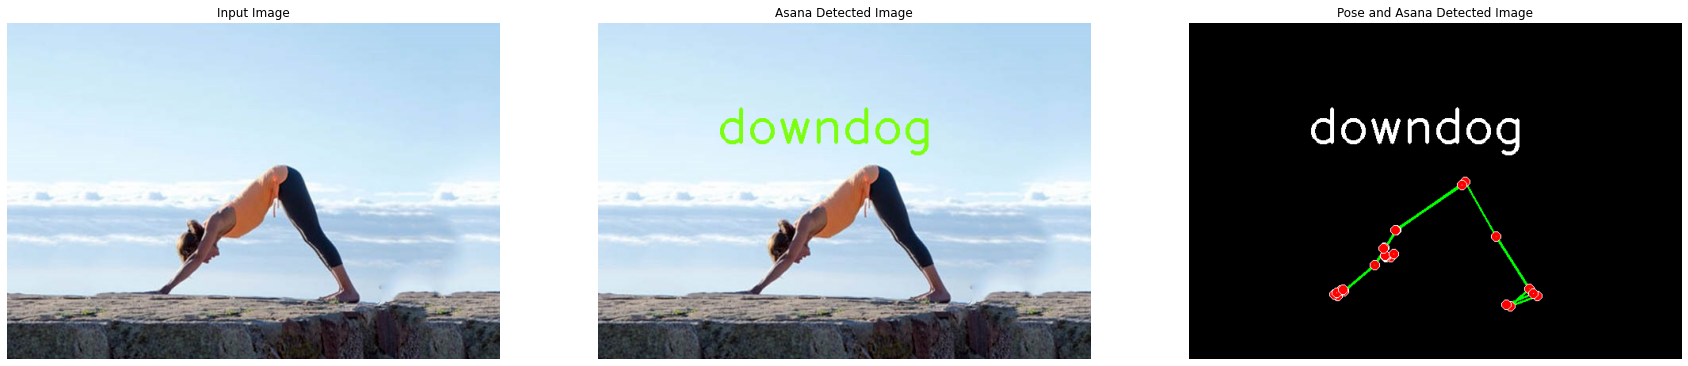

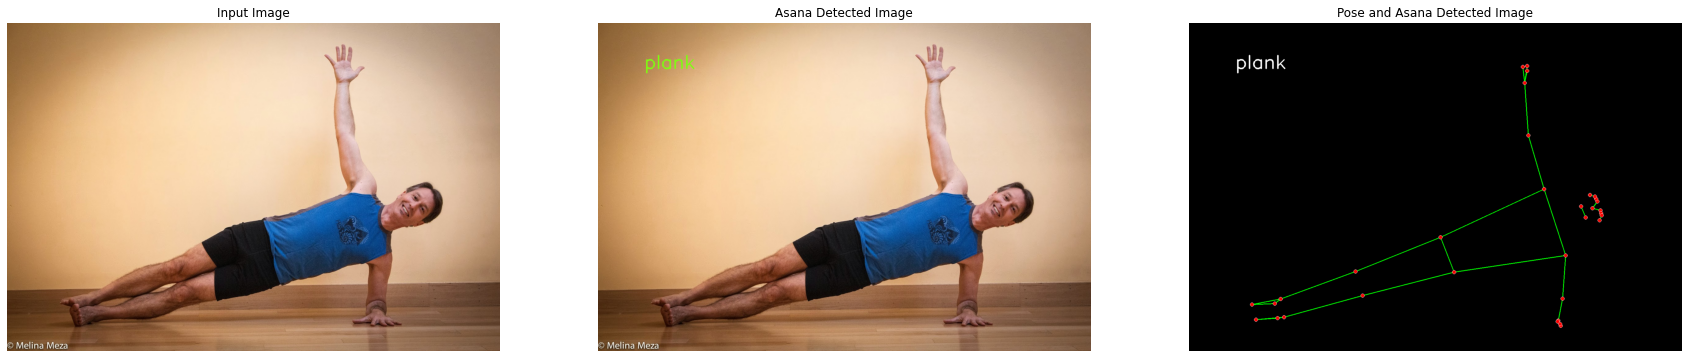

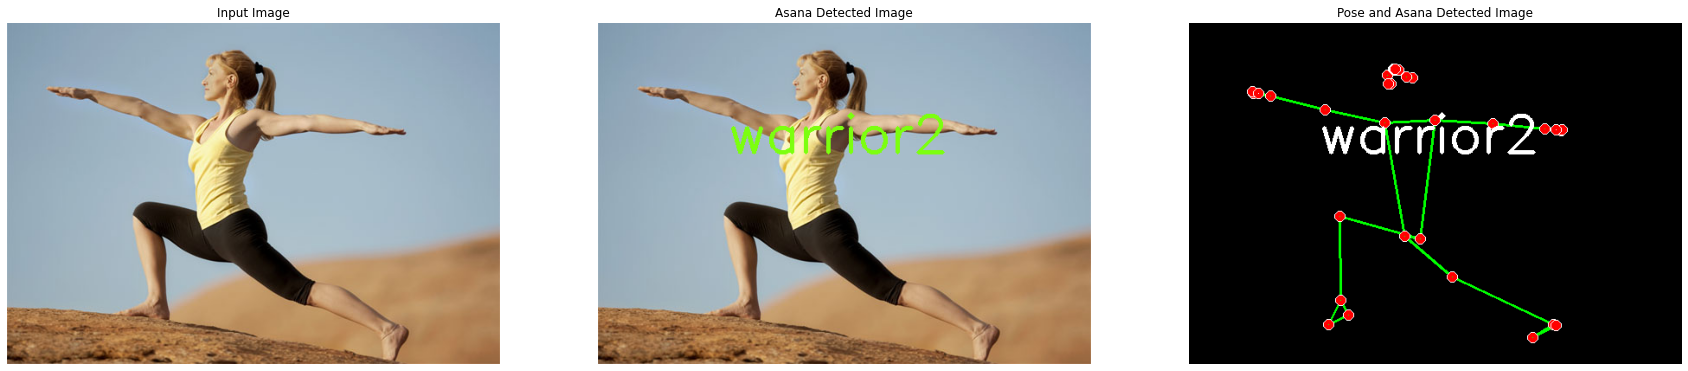

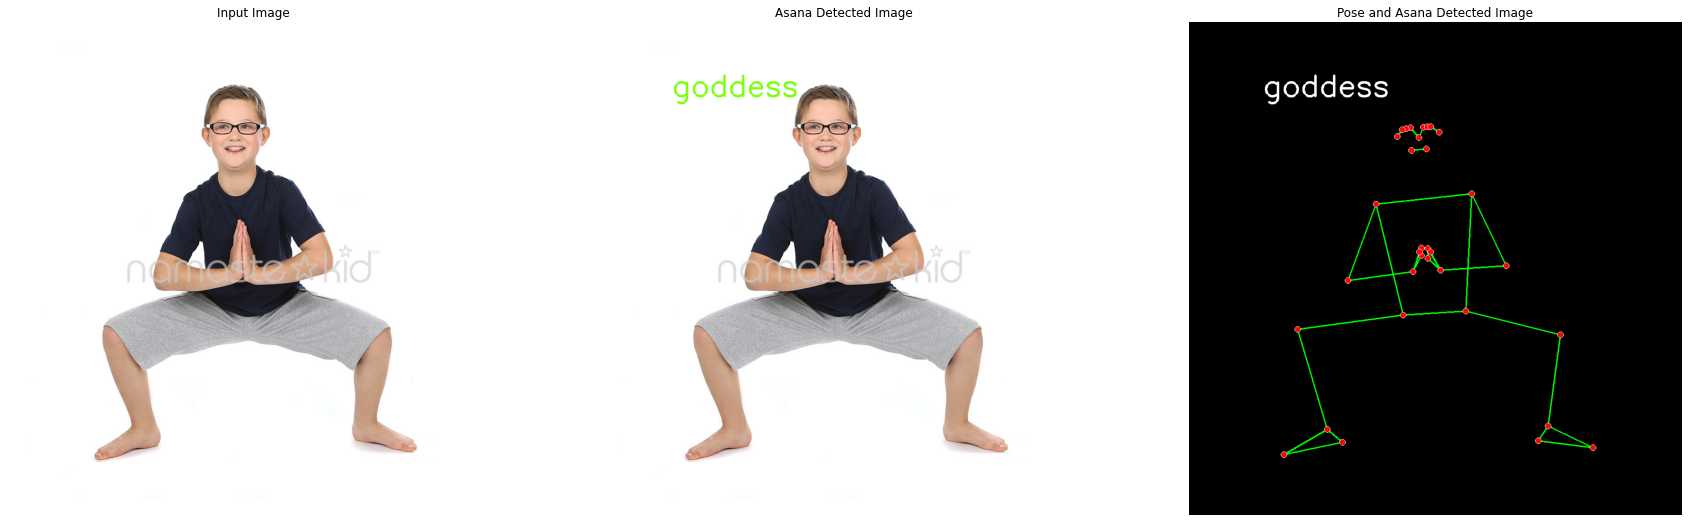

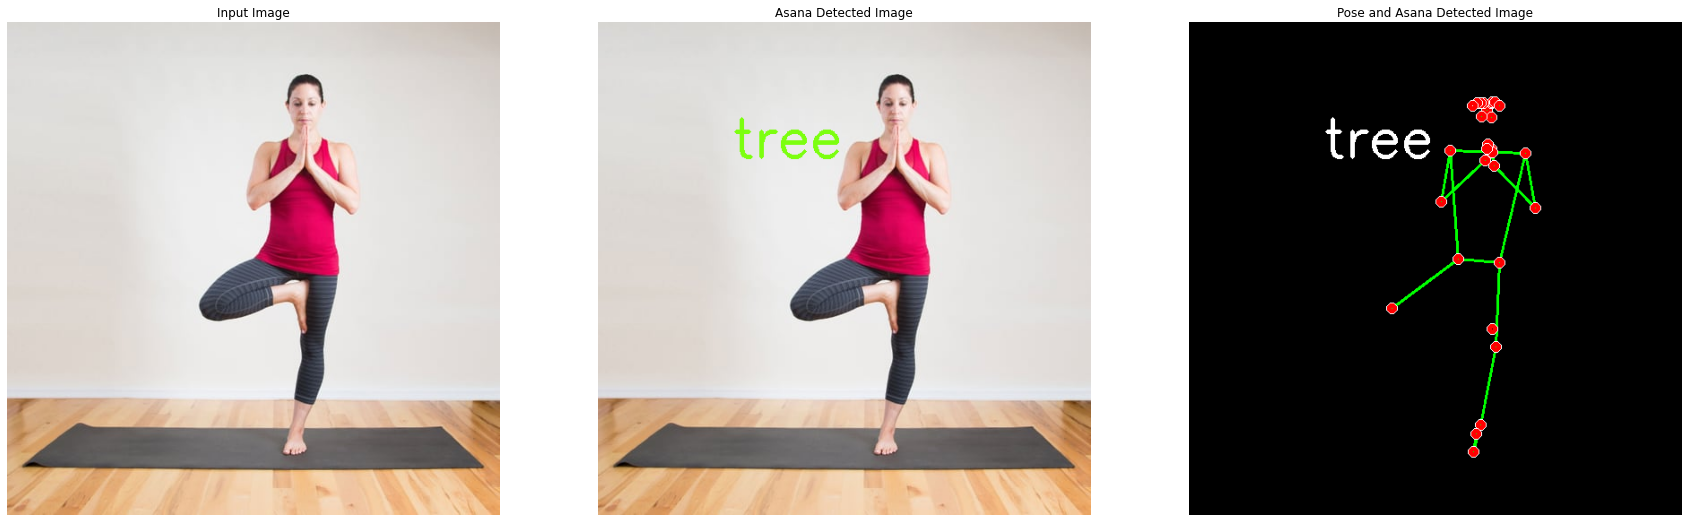

In [ ]:
for i in range(length):
    display_images(results[i])